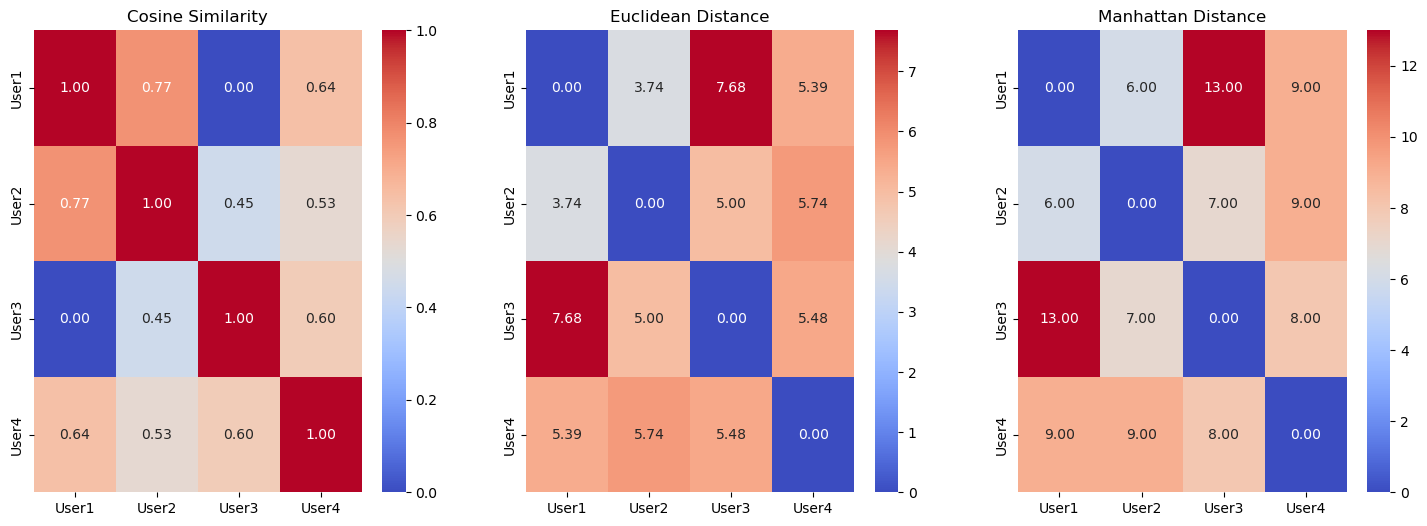

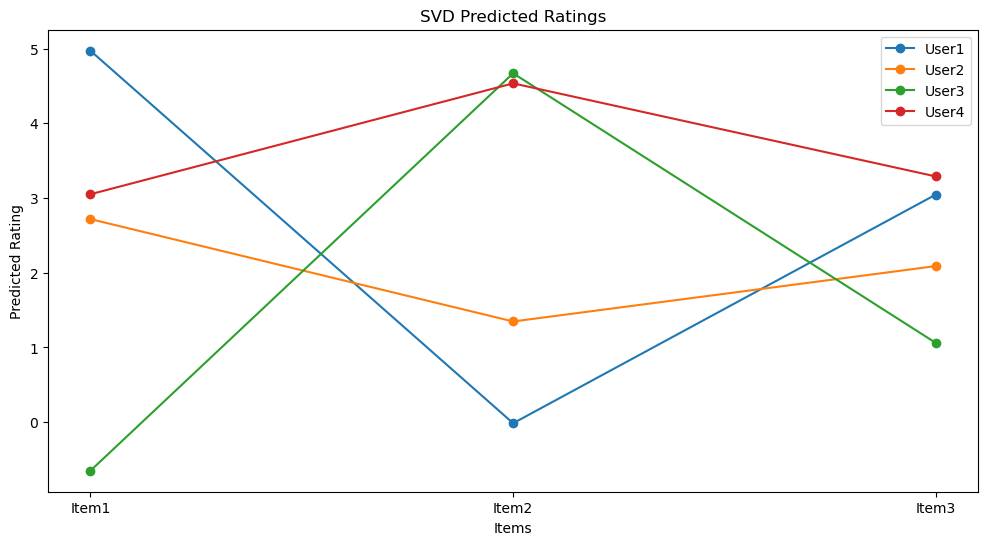

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import seaborn as sns
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds


data = {
    'User': ['User1', 'User2', 'User3', 'User4'],
    'Item1': [5, 4, 0, 2],
    'Item2': [0, 2, 5, 4],
    'Item3': [3, 0, 0, 5],
}
df = pd.DataFrame(data)
df.set_index('User', inplace=True)


cosine_sim = cosine_similarity(df)
euclidean_dist = euclidean_distances(df)
manhattan_dist = manhattan_distances(df)


sparse_df = csr_matrix(df.values.astype(float))


U, sigma, Vt = svds(sparse_df, k=min(sparse_df.shape)-1)
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt)


plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.heatmap(cosine_sim, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=df.index, yticklabels=df.index)
plt.title('Cosine Similarity')
plt.subplot(1, 3, 2)
sns.heatmap(euclidean_dist, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=df.index, yticklabels=df.index)
plt.title('Euclidean Distance')
plt.subplot(1, 3, 3)
sns.heatmap(manhattan_dist, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=df.index, yticklabels=df.index)
plt.title('Manhattan Distance')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(df.columns, predicted_ratings.T, marker='o')
plt.title('SVD Predicted Ratings')
plt.xlabel('Items')
plt.ylabel('Predicted Rating')
plt.legend(df.index)
plt.show()